# TOPICS IN ARTIFICIAL INTELLIGENCE PROJECT - 1

### Problem Statement

#### Implement a simple CNN architecture (not using pre-existing complete network architecture nor multi-layer blocks). Apply your model to the MNIST dataset and compare your results with existing CNN implementation.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, ZeroPadding2D
from keras.models import Sequential
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

## STEP 1

### Loading MNIST dataset which contains 60,000 training examples and 10,000 testing examples. 

### Then, this 60,000 examples are divided into 55,000 for training and 5,000 for validation.

In [2]:
(X_train_mnist, y_train_mnist), (X_test, y_test_mnist) = tf.keras.datasets.mnist.load_data()
y_train = y_train_mnist
y_test = y_test_mnist 

In [3]:
X_train, X_valid = X_train_mnist[:-5000], X_train_mnist[-5000:]
y_train, y_valid = y_train_mnist[:-5000], y_train_mnist[-5000:]

## STEP 2

### The data is standardized by normalizing and reshaping the data.

### One hot encoding is done to the output labels.

In [4]:
# # converting from int to float
# X_train = X_train.astype('float32')
# X_valid = X_valid.astype('float32')
# X_test = X_test.astype('float32')
# # normalize pizel values 0-1
# X_train = X_train/255.0
# X_valid = X_valid/255.0
# X_test = X_test/255.0

mean = X_train.mean(axis=0, keepdims=True)
stdDev = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - mean) / stdDev
X_valid = (X_valid - mean) / stdDev
X_test = (X_test - mean) / stdDev

In [5]:
# reshape dataset to have a single channel
train,valid,test = X_train.shape ,X_valid.shape,X_test.shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], X_valid.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
print('Training data reshaped from ',train,'to ',X_train.shape)
print('Validation data reshaped from ',valid,'to ',X_valid.shape)
print('Test data reshaped from ',test,'to ',X_test.shape)

Training data reshaped from  (55000, 28, 28) to  (55000, 28, 28, 1)
Validation data reshaped from  (5000, 28, 28) to  (5000, 28, 28, 1)
Test data reshaped from  (10000, 28, 28) to  (10000, 28, 28, 1)


In [6]:
# one hot encoding of output labels
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

## STEP 3

### Various model architectures are defined. This includes variation in layers and optmizers.

In [7]:
model1 = Sequential ([  
  Conv2D(filters=6, kernel_size=5, padding='SAME', activation='relu',input_shape=[28, 28, 1]),
  MaxPool2D(pool_size=2),
  Conv2D(filters=16, kernel_size=5, padding='SAME', activation='relu'),
  MaxPool2D(pool_size=2),
  Flatten(),
  Dense(units=120, activation='relu'),
  Dense(units=10, activation='softmax'),
    
])

model1.compile(
    loss = 'categorical_crossentropy', 
    optimizer = 'adam', 
    metrics = ['accuracy']) 

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 120)               9

In [8]:
model2 = Sequential ([  
  Conv2D(filters=32, kernel_size=3, padding='SAME', activation='relu',input_shape=[28, 28, 1]),
  MaxPool2D(pool_size=2),
  Conv2D(filters=64, kernel_size=3, padding='SAME', activation='relu'),
  MaxPool2D(pool_size=2),
  Conv2D(filters=64, kernel_size=3, padding='SAME', activation='relu'),
  Flatten(),
  Dense(units=64, activation='relu'),
  Dense(units=10, activation='softmax'),
    
])

model2.compile(
    loss='categorical_crossentropy',
    optimizer = 'SGD', 
    metrics = ['accuracy']) 

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

In [9]:
model3 = Sequential([
  Conv2D(filters=64, kernel_size=7, padding='SAME', activation='relu',input_shape=[28, 28, 1]),
  MaxPool2D(pool_size=2),
  Conv2D(filters=128, kernel_size=3, padding='SAME', activation='relu'),
  Conv2D(filters=128, kernel_size=3, padding='SAME', activation='relu'),
  MaxPool2D(pool_size=2),
  Flatten(),
  Dense(units=128, activation='relu'),
  Dense(units=10, activation='softmax'),
])


model3.compile(
    loss='categorical_crossentropy',
    optimizer = 'nadam', 
    metrics = ['accuracy']) 

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)             

In [25]:
model4 = model2

model4.compile(
    loss='categorical_crossentropy',
    optimizer = 'RMSprop', 
    metrics = ['accuracy']) 

model4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

## STEP 4

### All four models are trained.

In [11]:
fit1 = model1.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 31s 18ms/step - loss: 0.1832 - accuracy: 0.9458 - val_loss: 0.0715 - val_accuracy: 0.9800
Epoch 2/10
1719/1719 [==============================] - 29s 17ms/step - loss: 0.0618 - accuracy: 0.9805 - val_loss: 0.0588 - val_accuracy: 0.9826
Epoch 3/10
1719/1719 [==============================] - 29s 17ms/step - loss: 0.0464 - accuracy: 0.9848 - val_loss: 0.0539 - val_accuracy: 0.9868
Epoch 4/10
1719/1719 [==============================] - 29s 17ms/step - loss: 0.0347 - accuracy: 0.9888 - val_loss: 0.0572 - val_accuracy: 0.9856
Epoch 5/10
1719/1719 [==============================] - 31s 18ms/step - loss: 0.0305 - accuracy: 0.9908 - val_loss: 0.0589 - val_accuracy: 0.9840
Epoch 6/10
1719/1719 [==============================] - 31s 18ms/step - loss: 0.0229 - accuracy: 0.9923 - val_loss: 0.0440 - val_accuracy: 0.9902
Epoch 7/10
1719/1719 [==============================] - 31s 18ms/step - loss: 0.0167 - accuracy: 0.9947 - val_loss: 0.0531 -

In [12]:
fit2 = model2.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 53s 30ms/step - loss: 0.1252 - accuracy: 0.9625 - val_loss: 0.0497 - val_accuracy: 0.9872
Epoch 2/10
1719/1719 [==============================] - 53s 31ms/step - loss: 0.0478 - accuracy: 0.9868 - val_loss: 0.0442 - val_accuracy: 0.9892
Epoch 3/10
1719/1719 [==============================] - 54s 31ms/step - loss: 0.0375 - accuracy: 0.9895 - val_loss: 0.0429 - val_accuracy: 0.9880
Epoch 4/10
1719/1719 [==============================] - 48s 28ms/step - loss: 0.0322 - accuracy: 0.9923 - val_loss: 0.0512 - val_accuracy: 0.9878
Epoch 5/10
1719/1719 [==============================] - 58s 33ms/step - loss: 0.0297 - accuracy: 0.9927 - val_loss: 0.0654 - val_accuracy: 0.9908
Epoch 6/10
1719/1719 [==============================] - 63s 37ms/step - loss: 0.0263 - accuracy: 0.9943 - val_loss: 0.0875 - val_accuracy: 0.9894
Epoch 7/10
1719/1719 [==============================] - 55s 32ms/step - loss: 0.0242 - accuracy: 0.9948 - val_loss: 0.0718 -

In [13]:
fit3 = model3.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 217s 126ms/step - loss: 0.1128 - accuracy: 0.9656 - val_loss: 0.0480 - val_accuracy: 0.9872
Epoch 2/10
1719/1719 [==============================] - 219s 127ms/step - loss: 0.0432 - accuracy: 0.9871 - val_loss: 0.0442 - val_accuracy: 0.9894
Epoch 3/10
1719/1719 [==============================] - 221s 129ms/step - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.0511 - val_accuracy: 0.9862
Epoch 4/10
1719/1719 [==============================] - 217s 126ms/step - loss: 0.0271 - accuracy: 0.9922 - val_loss: 0.0499 - val_accuracy: 0.9862
Epoch 5/10
1719/1719 [==============================] - 217s 126ms/step - loss: 0.0221 - accuracy: 0.9938 - val_loss: 0.0413 - val_accuracy: 0.9900
Epoch 6/10
1719/1719 [==============================] - 221s 128ms/step - loss: 0.0187 - accuracy: 0.9943 - val_loss: 0.0589 - val_accuracy: 0.9884
Epoch 7/10
1719/1719 [==============================] - 225s 131ms/step - loss: 0.0207 - accuracy: 0.9944 - val_

In [26]:
fit4 = model4.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 61s 34ms/step - loss: 0.0127 - accuracy: 0.9987 - val_loss: 0.2014 - val_accuracy: 0.9926
Epoch 2/10
1719/1719 [==============================] - 53s 31ms/step - loss: 0.0112 - accuracy: 0.9989 - val_loss: 0.2121 - val_accuracy: 0.9926
Epoch 3/10
1719/1719 [==============================] - 53s 31ms/step - loss: 0.0087 - accuracy: 0.9991 - val_loss: 0.2894 - val_accuracy: 0.9924
Epoch 4/10
1719/1719 [==============================] - 55s 32ms/step - loss: 0.0152 - accuracy: 0.9987 - val_loss: 0.3364 - val_accuracy: 0.9918
Epoch 5/10
1719/1719 [==============================] - 49s 28ms/step - loss: 0.0148 - accuracy: 0.9988 - val_loss: 0.3600 - val_accuracy: 0.9904
Epoch 6/10
1719/1719 [==============================] - 64s 37ms/step - loss: 0.0132 - accuracy: 0.9990 - val_loss: 0.3302 - val_accuracy: 0.9906
Epoch 7/10
1719/1719 [==============================] - 65s 38ms/step - loss: 0.0129 - accuracy: 0.9990 - val_loss: 0.2562 -

## STEP 5:

### Evaluation of all four models are done.

In [15]:
model1.evaluate(X_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 1216.3678 - accuracy: 0.9857


[1216.3677978515625, 0.9857000112533569]

In [16]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 72985.4766 - accuracy: 0.9914


[72985.4765625, 0.9914000034332275]

In [17]:
model3.evaluate(X_test, y_test)

313/313 [==============================] - 11s 34ms/step - loss: 5167.6729 - accuracy: 0.9896


[5167.6728515625, 0.9896000027656555]

In [27]:
model4.evaluate(X_test, y_test)

313/313 [==============================] - 4s 14ms/step - loss: 36147.9922 - accuracy: 0.9913


[36147.9921875, 0.9912999868392944]

## STEP 6: 
    
### Calculation of other performance measures.

In [28]:
y_pred_1 = model1.predict(X_test)
y_pred_2 = model2.predict(X_test)
y_pred_3 = model3.predict(X_test)
y_pred_4 = model4.predict(X_test)

predictions1 = []
predictions2 = []
predictions3 = []
predictions4 = []

for i in range(len(X_test)):
   predictions1.append(np.argmax(y_pred_1[i]))
   predictions2.append(np.argmax(y_pred_2[i]))
   predictions3.append(np.argmax(y_pred_3[i]))
   predictions4.append(np.argmax(y_pred_4[i]))
    
predictions1 = np.array(predictions1)
predictions2 = np.array(predictions2)
predictions3 = np.array(predictions3)
predictions4 = np.array(predictions4)

In [20]:
print('ARCHITECTURE 1')
print('Precision Score: ', precision_score(y_test_mnist, predictions1, average="macro"))
print('Recall Score: ', recall_score(y_test_mnist, predictions1, average='macro'))
print('F1 Score: ',f1_score(y_test_mnist, predictions1, average='macro'))
     

ARCHITECTURE 1
Precision Score:  0.9856145251517237
Recall Score:  0.9855657281003799
F1 Score:  0.9855656351634581


In [21]:
print('ARCHITECTURE 2')
print('Precision Score: ', precision_score(y_test_mnist, predictions2, average="macro"))
print('Recall Score: ', recall_score(y_test_mnist, predictions2, average='macro'))
print('F1 Score: ',f1_score(y_test_mnist, predictions2, average='macro'))

ARCHITECTURE 2
Precision Score:  0.9913085526981344
Recall Score:  0.9914051198030028
F1 Score:  0.9913501515297763


In [22]:
print('ARCHITECTURE 3')
print('Precision Score: ', precision_score(y_test_mnist, predictions3, average="macro"))
print('Recall Score: ', recall_score(y_test_mnist, predictions3, average='macro'))
print('F1 Score: ',f1_score(y_test_mnist, predictions3, average='macro'))

ARCHITECTURE 3
Precision Score:  0.9896762393529276
Recall Score:  0.9895479526605777
F1 Score:  0.9895914158187002


In [29]:
print('ARCHITECTURE 4')
print('Precision Score: ', precision_score(y_test_mnist, predictions4, average="macro"))
print('Recall Score: ', recall_score(y_test_mnist, predictions4, average='macro'))
print('F1 Score: ',f1_score(y_test_mnist, predictions4, average='macro'))

ARCHITECTURE 4
Precision Score:  0.9913225708483908
Recall Score:  0.9911679499746955
F1 Score:  0.9912371900153272


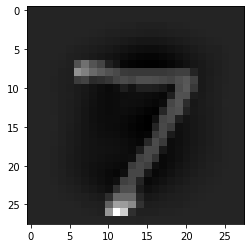

In [30]:
plt.imshow(X_test[0], cmap='gray')      #the image at X-test[0]
plt.show()

In [31]:
predictions1[0]

7

In [32]:
predictions2[0]

7

In [33]:
predictions3[0]

7

In [34]:
predictions4[0]

7